# NBA

Nos centramos solo en los jugadores importantes ( más de 27 min por partido)

- Me da la sensación de que durante este curso los jugadores importantes están metiendo muchísimos puntos, creo que alrededor de unos 18ppp, compruébalo.

In [ ]:
import pandas as pd

df_nba = pd.read_csv('nba_stats.csv')

print(len(df_nba))

df_nba.head()

485


,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,29.7,14,34.6,36.4,14.8,155,...,6.1,1.0,1.8,3.7,43.2,38.1,49.4,15.0,123.0,104.7
1,NaN,Kevin Durant,Pho,F,35.1,15,36.9,32.6,16.6,128,...,5.5,0.7,1.2,4.0,38.5,36.9,43.9,11.6,121.8,112.2
2,NaN,Luka Doncic,Dal,G,24.7,15,34.9,34.4,15.4,114,...,8.1,1.2,0.3,3.9,38.8,38.6,46.9,14.6,120.5,112.8
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.4,14,34.1,33.5,10.2,101,...,6.4,2.4,0.9,2.4,36.5,36.7,42.9,12.4,126.9,104.5
4,NaN,Giannis Antetokounmpo,Mil,F,29.0,14,33.0,35.7,17.7,136,...,4.6,1.1,1.1,4.1,40.0,34.2,44.6,13.6,116.7,106.5


In [ ]:
df_titulares = df_nba[(df_nba['MPG'] > 27)]

print(len(df_titulares))

df_titulares.head()


143


,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,29.7,14,34.6,36.4,14.8,155,...,6.1,1.0,1.8,3.7,43.2,38.1,49.4,15.0,123.0,104.7
1,NaN,Kevin Durant,Pho,F,35.1,15,36.9,32.6,16.6,128,...,5.5,0.7,1.2,4.0,38.5,36.9,43.9,11.6,121.8,112.2
2,NaN,Luka Doncic,Dal,G,24.7,15,34.9,34.4,15.4,114,...,8.1,1.2,0.3,3.9,38.8,38.6,46.9,14.6,120.5,112.8
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.4,14,34.1,33.5,10.2,101,...,6.4,2.4,0.9,2.4,36.5,36.7,42.9,12.4,126.9,104.5
4,NaN,Giannis Antetokounmpo,Mil,F,29.0,14,33.0,35.7,17.7,136,...,4.6,1.1,1.1,4.1,40.0,34.2,44.6,13.6,116.7,106.5


In [ ]:
ppg = df_titulares['PPG'].mean()

print(ppg)

17.4006993006993


***Exactamente son 17.4, asi que alrededor de 18 pero más para 17 puntos por partido de media.***
***Viendo esta media podemos asegurar que los jugadores importantes estan metiendo muchísimos puntos.***

- Además me da la sensación de que los jugadores jóvenes sub 27 están dando un paso adelante y meten más puntos que los mayores.


In [ ]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=11897745185b624a9971fbc48aba49486df039f7865409ce51613e9ce84180cc
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
sub27 = df_titulares[df_titulares['AGE'] < 27]['PPG']
mas_sub27 = df_titulares[df_titulares['AGE'] >= 27]['PPG']

print(sub27.mean())
print(mas_sub27.mean())

17.23888888888889
17.564788732394366


In [ ]:
import pingouin as pg

test_result = pg.ttest(sub27,mas_sub27, alternative='greater')

print(test_result)

               T         dof alternative     p-val         CI95%   cohen-d  \
T-test -0.318667  139.510563     greater  0.624772  [-2.02, inf]  0.053331   

         BF10    power  
T-test  0.376  0.02487  


***Como observamos realmente no es asi, los mayores meten más que los jugadores jóvenes sub27.***

- Me gustaría comprobar  si hay diferencia entre posiciones, y cual son en las posiciones en las que los jugadores meten más puntos.



In [ ]:
posC = df_titulares[df_titulares['POS'] == 'C']['PPG']
posF = df_titulares[df_titulares['POS'] == 'F']['PPG']
posG = df_titulares[df_titulares['POS'] == 'G']['PPG']
posGF = df_titulares[df_titulares['POS'] == 'G-F']['PPG']

print(posC.mean())
print(posF.mean())
print(posG.mean())
print(posGF.mean())




16.86842105263158
17.225
17.71818181818182
17.5


In [ ]:
anova_result = pg.anova(data=df_titulares, dv='PPG', between='POS')

print(anova_result)

  Source  ddof1  ddof2         F     p-unc       np2
0    POS      4    138  0.098401  0.982813  0.002844


***La que mete más puntos es la posición G.***

- ¿Se están metiendo más puntos de media por jugador que respecto al año anterior?



In [ ]:
df_nba22 = pd.read_csv('nba_stats22.csv')

print(len(df_nba22))

df_nba22.head()

609


,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C-F,29.1,66,34.6,37.0,14.5,771,...,4.2,1.0,1.7,3.4,43.2,37.2,47.4,13.0,124.4,104.1
1,NaN,Luka Doncic,Dal,F-G,24.1,66,36.2,37.7,14.0,694,...,8.0,1.4,0.5,3.6,41.0,40.4,49.0,14.4,120.0,109.2
2,NaN,Damian Lillard,Por,G,32.7,58,36.3,33.8,13.7,558,...,7.3,0.9,0.3,3.3,36.9,39.5,44.3,11.5,126.4,117.6
3,NaN,Shai Gilgeous-Alexander,Okc,G-F,24.7,68,35.5,32.8,12.2,739,...,5.5,1.6,1.0,2.8,36.2,36.9,41.7,10.6,124.9,109.8
4,NaN,Giannis Antetokounmpo,Mil,F,28.3,63,32.1,38.8,16.2,772,...,5.7,0.8,0.8,3.9,42.9,36.8,48.6,15.9,116.8,100.6


In [ ]:
ppg_2023 = df_nba['PPG']
ppg_2022 = df_nba22['PPG']

print(ppg_2023.mean())
print(ppg_2022.mean())

8.630515463917526
8.950903119868636


In [ ]:
test_result2 = pg.ttest(ppg_2023,ppg_2022, alternative='greater')

print(test_result2)

               T          dof alternative     p-val         CI95%   cohen-d  \
T-test -0.747342  1002.327774     greater  0.772484  [-1.03, inf]  0.045855   

        BF10     power  
T-test  0.18  0.008246  


***No, en 2022 hicieron más puntos de media por jugador que en este 2023.***

- Quiero saber si hay diferencia en la eficacia de los tiros entre los jugadores independientemente de sus posiciones entre la temporada 2022 y la 2023



In [ ]:
efi_22 = df_nba22['eFG%']
efi_23 = df_nba['eFG%']

print(efi_22.mean())
print(efi_23.mean())

0.5352260726072607
0.5006061855670104


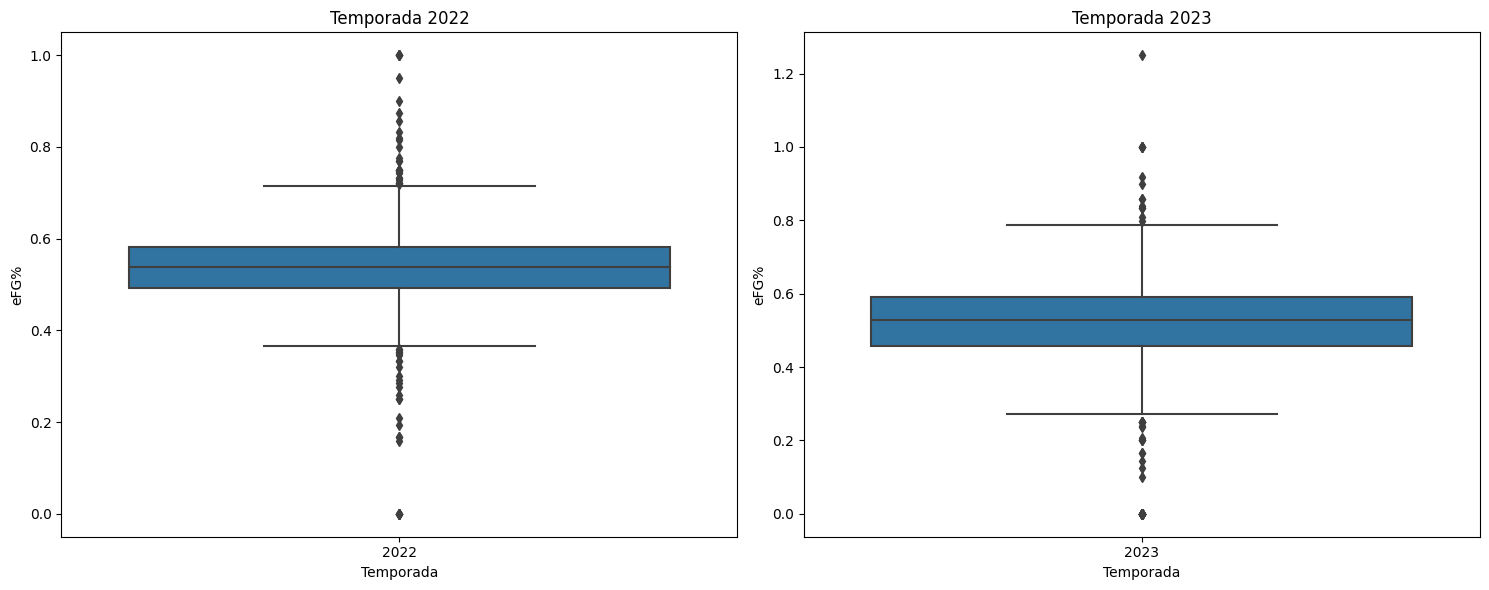

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Season', y='eFG%', data=df_nba22)
plt.title('Temporada 2022')
plt.xlabel('Temporada')
plt.ylabel('eFG%')

plt.subplot(1, 2, 2)
sns.boxplot(x='Season', y='eFG%', data=df_nba)
plt.title('Temporada 2023')
plt.xlabel('Temporada')
plt.ylabel('eFG%')

plt.tight_layout()
plt.show()

In [ ]:
ttest_result = pg.ttest(efi_22, efi_23, alternative='greater')
print(ttest_result)

               T         dof alternative     p-val        CI95%   cohen-d  \
T-test  3.681872  770.299203     greater  0.000124  [0.02, inf]  0.235645   

           BF10     power  
T-test  105.442  0.986806  


***En 2022 hubo mas eficacia que en este 2023.***